In [47]:
import chromatix.functional as cx
import jax.numpy as jnp
from jax import random
from chromatix.elements import VectorPlaneWave, PlaneWave
import jax
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
# We first create an empty field. 
N = 512
field = cx.empty_field(shape=(N, N), dx=0.2, spectrum=0.532, spectral_density=1.0)

# And then turn it into the field generated by the point source afterb the lens.
# field = cx.plane_wave(field, z=0.0, f=10.0, n=1.0, NA=0.8)
# print("field shape", field.shape)

#Add the input phase for polarization light
spectrum = 0.532
phi = 0.1 # angle between z axis and xy plane
theta = 1 # angle between x and y
n = 1
kykx = n * 2 * jnp.pi / spectrum * jnp.array([jnp.sin(phi)* jnp.sin(theta), jnp.sin(phi) * jnp.cos(theta)]) # y and x 

# source = PlaneWave(shape=(N, N), dx = 0.0001, spectrum=spectrum, spectral_density=1.0, power = 1, pupil = None, phase = jnp.ones([1,N,N,1]), k = k)

# params = source.init(random.PRNGKey(42))
# field = source.apply(params)
# # # field = cx.vector_plane_wave(field, k, E0)
# print(field.shape)
print(kykx)
field = cx.plane_wave(field, kykx = kykx)

[0.99216366 0.63706094]


In [50]:
field = cx.transfer_propagate(field, z = 7, n = 1, N_pad = 10 )

? why padding different, simulated field is different

[[[[0.2]]]]


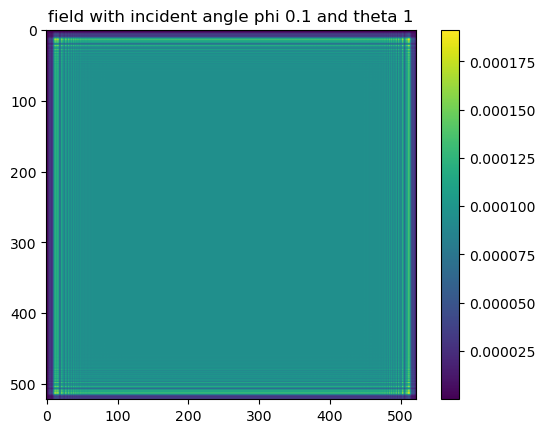

In [51]:
print(field.dx)
fig,ax = plt.subplots()
im = ax.imshow(field.intensity.squeeze())
ax.set_title(("field with incident angle phi "+ str(phi) + " and theta "  + str(theta)))
# xaxis = jnp.arange(-field.dx*N/2,field.dx*N/2,N)
# ax.set_xticks([-field.dx*N/2,0,field.dx*N/2])
# # ax.set_xlim([-N*field.dx,N*field.dx])
fig.colorbar(im, orientation='vertical')
plt.show()